In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.2893 - loss: 1.9012 - val_accuracy: 0.5082 - val_loss: 1.3525
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 64ms/step - accuracy: 0.5155 - loss: 1.3309 - val_accuracy: 0.5886 - val_loss: 1.1496
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6020 - loss: 1.1326 - val_accuracy: 0.6304 - val_loss: 1.0442
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6525 - loss: 0.9909 - val_accuracy: 0.6556 - val_loss: 0.9956
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6823 - loss: 0.8962 - val_accuracy: 0.6939 - val_loss: 0.9028
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.7149 - loss: 0.8169 - val_accuracy: 0.6986 - val_loss: 0.8776
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.7345 - loss: 0.7585 - val_accuracy: 0.7080 - val_loss: 0.8450
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7553 - loss: 0.6991 - 

In [7]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7065 - loss: 0.8833
Test Loss: 0.8839321136474609, Test Accuracy: 0.704800009727478


In [9]:
model.save('my_model.keras')


In [12]:
# Load the model
model = tf.keras.models.load_model('cnn_cifar10_model.h5')

# Predicting on new data
def predict_image(image):
    img = tf.image.resize(image, (32, 32))
    img = tf.expand_dims(img, axis=0) / 255.0
    predictions = model.predict(img)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

# Test with an image from the test set
sample_image = X_test[0]
print(f'Predicted class: {predict_image(sample_image)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted class: cat


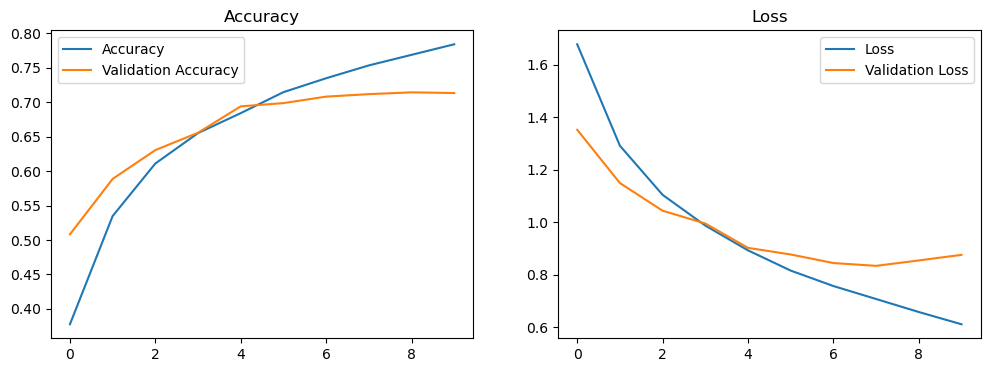

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
